In [175]:
import statsmodels.formula.api as sm
import pandas as pd
import linearmodels as lm
import matplotlib.pyplot as plt; plt.rcParams["figure.figsize"] = (20,10)
import numpy as np

### Question 4

#### a

In [2]:
''' Loading and Preprocessing the Data '''
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')
gm[['logGDPpercap_within','lifeExp_within']] = (gm.groupby('continent')[['logGDPpercap','lifeexp']].transform(lambda x: x - x.mean()))

''' Analyzing the Within Variation '''
m1 = sm.ols(formula = 'lifeExp_within ~ logGDPpercap_within', data = gm).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeExp_within   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1228.
Date:                Sun, 19 Mar 2023   Prob (F-statistic):          5.06e-203
Time:                        14:10:57   Log-Likelihood:                -5740.0
No. Observations:                1704   AIC:                         1.148e+04
Df Residuals:                    1702   BIC:                         1.149e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.137e-06      0.170  -6.68e-06      1.000      -0.334       0.334
logGDPpercap_within     6.4220      0.183     35.044      0.000       6.063       6.781
==============================================================================
Omnibus:                       80.310   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.401
Skew:                          -0.488   Prob(JB):                     4.29e-22
Kurtosis:                       3.659   Cond. No.                         1.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### b

In [3]:
''' Loading and Preprocessing Data '''
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

''' Running Regression with Continent and Year Fixed Effects '''
twfe = sm.ols(formula = 'lifeexp ~ logGDPpercap + continent + year', data = gm).fit()
twfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1119.
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:10:57   Log-Likelihood:                -5413.6
No. Observations:                1704   AIC:                         1.084e+04
Df Residuals:                    1697   BIC:                         1.088e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              -465.8696     16.674    -27.939      0.000    -498.574    -433.165
continent[T.Americas]     8.9259      0.463     19.280      0.000       8.018       9.834
continent[T.Asia]         7.0629      0.396     17.840      0.000       6.286       7.839
continent[T.Europe]      12.5078      0.510     24.541      0.000      11.508      13.507
continent[T.Oceania]     12.7507      1.275     10.002      0.000      10.250      15.251
logGDPpercap              5.0238      0.159     31.503      0.000       4.711       5.337
year                      0.2416      0.009     28.142      0.000       0.225       0.258
==============================================================================
Omnibus:                       66.798   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.847
Skew:                          -0.433   Prob(JB):                     2.78e-18
Kurtosis:                       3.623   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### c

##### We were grouping by continent only, and ignoring the year fixed effects

In [4]:
''' Loading and Preprocessing the Data '''
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

# below, tweaking the groupby function to include continent and year, so are within effect is now within a continent and year.
gm[['logGDPpercap_within', 'lifeExp_within']] = gm.groupby(['continent', 'year'])[['logGDPpercap', 'lifeexp']].transform(lambda row: row - row.mean())

''' Analyzing the Within Variation '''
m1 = sm.ols(formula = 'lifeExp_within ~ logGDPpercap_within', data = gm).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         lifeExp_within   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     1069.
Date:                Sun, 19 Mar 2023   Prob (F-statistic):          2.26e-182
Time:                        14:10:57   Log-Likelihood:                -5336.7
No. Observations:                1704   AIC:                         1.068e+04
Df Residuals:                    1702   BIC:                         1.069e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.333e-07      0.134   -6.2e-06      1.000      -0.264       0.264
logGDPpercap_within     5.0529      0.155     32.696      0.000       4.750       5.356
==============================================================================
Omnibus:                       60.180   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.402
Skew:                          -0.289   Prob(JB):                     5.80e-23
Kurtosis:                       4.052   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Verifying this by running the regression from part b without controlling for year

In [5]:
''' Loading and Preprocessing Data '''
gm = pd.read_stata('./data/gapminder.dta')
gm['logGDPpercap'] = gm['gdppercap'].apply('log')

''' Running Regression with Continent and Year Fixed Effects '''
twfe = sm.ols(formula = 'lifeexp ~ logGDPpercap + continent ', data = gm).fit()
twfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     807.6
Date:                Sun, 19 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:10:57   Log-Likelihood:                -5740.0
No. Observations:                1704   AIC:                         1.149e+04
Df Residuals:                    1698   BIC:                         1.152e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.3170      1.359      1.704      0.088      -0.349       4.983
continent[T.Americas]     7.0147      0.554     12.652      0.000       5.927       8.102
continent[T.Asia]         5.9117      0.477     12.400      0.000       4.977       6.847
continent[T.Europe]       9.5771      0.604     15.855      0.000       8.392      10.762
continent[T.Oceania]      9.2135      1.536      5.999      0.000       6.201      12.226
logGDPpercap              6.4220      0.183     35.003      0.000       6.062       6.782
==============================================================================
Omnibus:                       80.310   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.400
Skew:                          -0.488   Prob(JB):                     4.29e-22
Kurtosis:                       3.659   Cond. No.                         82.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### ~voila~

### Question 8

#### a

In [318]:
''' Setting up our dataframe '''

od = pd.read_stata('./data/organ_donations.dta')
od['california'] =(od['state'] == 'California')

def treat(quarter_num) -> bool:
    if quarter_num[-5:] == '32011' or  quarter_num[-5:] == '12012' or  quarter_num[-5:] == '42011':
        return True
    else:
        return False 
    
od['after'] = od['quarter'].apply(lambda row: treat(row))
od['treated'] = 1*(od.california & od.after)

In [319]:
''' Specifying our regression

    note: the libraries used in the book are outdated and have since been depricated. This is the closest I have been able to get
            to replication.
    
'''

sm.ols(formula = 'rate ~ treated + state + quarter', data = od).fit(method='qr', cov_kwds='cluster').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           9.77e-94
Time:                        12:41:43   Log-Likelihood:                 388.57
No. Observations:                 162   AIC:                            -711.1
Df Residuals:                     129   BIC:                            -609.2
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7632      0.011     69.662      0.000       0.741       0.785
state[T.Arizona]                 -0.5329      0.014    -37.466      0.000      -0.561      -0.505
state[T.California]              -0.4950      0.018    -28.239      0.000      -0.530      -0.460
state[T.Colorado]                -0.1055      0.014     -7.417      0.000      -0.134      -0.077
state[T.Connecticut]             -0.3802      0.014    -26.731      0.000      -0.408      -0.352
state[T.District of Columbia]    -0.4300      0.014    -30.237      0.000      -0.458      -0.402
state[T.Florida]                 -0.3769      0.014    -26.504      0.000      -0.405      -0.349
state[T.Hawaii]                  -0.3524      0.014    -24.779      0.000      -0.381      -0.324
state[T.Louisiana]               -0.2167      0.014    -15.239      0.000      -0.245      -0.189
state[T.Maryland]                -0.3076      0.014    -21.629      0.000      -0.336      -0.279
state[T.Michigan]                -0.5409      0.014    -38.029      0.000      -0.569      -0.513
state[T.Minnesota]               -0.2457      0.014    -17.277      0.000      -0.274      -0.218
state[T.Missouri]                -0.3660      0.014    -25.733      0.000      -0.394      -0.338
state[T.Montana]                 -0.1184      0.014     -8.328      0.000      -0.147      -0.090
state[T.Nebraska]                -0.3308      0.014    -23.260      0.000      -0.359      -0.303
state[T.New Hampshire]           -0.2292      0.014    -16.115      0.000      -0.257      -0.201
state[T.New Jersey]              -0.4607      0.014    -32.396      0.000      -0.489      -0.433
state[T.New York]                -0.6435      0.014    -45.249      0.000      -0.672      -0.615
state[T.North Carolina]          -0.2483      0.014    -17.462      0.000      -0.276      -0.220
state[T.Ohio]                    -0.2077      0.014    -14.606      0.000      -0.236      -0.180
state[T.Pennsylvania]            -0.3190      0.014    -22.433      0.000      -0.347      -0.291
state[T.South Carolina]          -0.5043      0.014    -35.457      0.000      -0.532      -0.476
state[T.Tennessee]               -0.4381      0.014    -30.806      0.000      -0.466      -0.410
state[T.Virginia]                -0.4324      0.014    -30.401      0.000      -0.461      -0.404
state[T.Washington]              -0.1863      0.014    -13.100      0.000      -0.214      -0.158
state[T.Wisconsin]               -0.2012      0.014    -14.148      0.000      -0.229      -0.173
state[T.Wyoming]                 -0.1823      0.014    -12.820      0.000      -0.210      -0.154
quarter[T.Q12012]                 0.0192      0.007      2.851      0.005       0.006       0.033
quarter[T.Q22011]                 0.0073     

#### b.

In [320]:
''' Revising the Treatment Variable '''

def pacific(state):
    match state:
        case 'California':
            return True
        case 'Oregon':
            return True
        case 'Washington':
            return True
        case 'Hawaii':
            return True
        case 'Alaska':
            return True
        case _:
            return False
        
od['pacific'] = od.state.apply(lambda state: pacific(state))
od['treated'] = 1*(od.pacific & od.after)

In [321]:
ols = sm.ols(formula = 'rate ~ treated + state + quarter', data = od).fit(method='qr', cov_kwds='cluster')
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rate   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.17e-93
Time:                        12:41:46   Log-Likelihood:                 388.34
No. Observations:                 162   AIC:                            -710.7
Df Residuals:                     129   BIC:                            -608.8
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.7678      0.012     64.474      0.000       0.744       0.791
state[T.Arizona]                 -0.5378      0.015    -35.263      0.000      -0.568      -0.508
state[T.California]              -0.5063      0.014    -35.545      0.000      -0.534      -0.478
state[T.Colorado]                -0.1104      0.015     -7.242      0.000      -0.141      -0.080
state[T.Connecticut]             -0.3851      0.015    -25.252      0.000      -0.415      -0.355
state[T.District of Columbia]    -0.4350      0.015    -28.522      0.000      -0.465      -0.405
state[T.Florida]                 -0.3819      0.015    -25.040      0.000      -0.412      -0.352
state[T.Hawaii]                  -0.3524      0.014    -24.743      0.000      -0.381      -0.324
state[T.Louisiana]               -0.2217      0.015    -14.536      0.000      -0.252      -0.192
state[T.Maryland]                -0.3126      0.015    -20.494      0.000      -0.343      -0.282
state[T.Michigan]                -0.5458      0.015    -35.787      0.000      -0.576      -0.516
state[T.Minnesota]               -0.2507      0.015    -16.436      0.000      -0.281      -0.221
state[T.Missouri]                -0.3709      0.015    -24.321      0.000      -0.401      -0.341
state[T.Montana]                 -0.1234      0.015     -8.092      0.000      -0.154      -0.093
state[T.Nebraska]                -0.3358      0.015    -22.015      0.000      -0.366      -0.306
state[T.New Hampshire]           -0.2342      0.015    -15.353      0.000      -0.264      -0.204
state[T.New Jersey]              -0.4657      0.015    -30.534      0.000      -0.496      -0.436
state[T.New York]                -0.6485      0.015    -42.520      0.000      -0.679      -0.618
state[T.North Carolina]          -0.2533      0.015    -16.609      0.000      -0.283      -0.223
state[T.Ohio]                    -0.2127      0.015    -13.946      0.000      -0.243      -0.183
state[T.Pennsylvania]            -0.3240      0.015    -21.244      0.000      -0.354      -0.294
state[T.South Carolina]          -0.5092      0.015    -33.389      0.000      -0.539      -0.479
state[T.Tennessee]               -0.4431      0.015    -29.052      0.000      -0.473      -0.413
state[T.Virginia]                -0.4373      0.015    -28.675      0.000      -0.468      -0.407
state[T.Washington]              -0.1863      0.014    -13.081      0.000      -0.214      -0.158
state[T.Wisconsin]               -0.2062      0.015    -13.518      0.000      -0.236      -0.176
state[T.Wyoming]                 -0.1873      0.015    -12.280      0.000      -0.217      -0.157
quarter[T.Q12012]                 0.0199      0.007      2.878      0.005       0.006       0.034
quarter[T.Q22011]                 0.0073     

In [323]:
for value in od.quarter.unique():
    if value[1] != '2':
        od[value] = 1*od['california']

In [337]:
od

,state,quarter,rate,quarter_num,california,after,treated,pacific,Q42010,Q12011,Q32011,Q42011,Q12012
0,Alaska,Q42010,0.7500,Quarter 4 2010,False,False,0,True,0,0,0,0,0
1,Alaska,Q12011,0.7700,Quarter 1 2011,False,False,0,True,0,0,0,0,0
2,Alaska,Q22011,0.7700,Quarter 2 2011,False,False,0,True,0,0,0,0,0
3,Alaska,Q32011,0.7800,Quarter 3 2011,False,True,1,True,0,0,0,0,0
4,Alaska,Q42011,0.7800,Quarter 4 2011,False,True,1,True,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Wyoming,Q12011,0.5946,Quarter 1 2011,False,False,0,False,0,0,0,0,0
158,Wyoming,Q22011,0.5937,Quarter 2 2011,False,False,0,False,0,0,0,0,0
159,Wyoming,Q32011,0.5911,Quarter 3 2011,False,True,0,False,0,0,0,0,0
160,Wyoming,Q42011,0.5854,Quarter 4 2011,False,True,0,False,0,0,0,0,0


#### c.

In [327]:
ols = sm.ols(formula = 'rate ~ Q42010 + Q12011 + Q32011 + Q42011 + Q12012 + state', data = od).fit(method='qr', cov_kwds='cluster')
ols.summary()

/Users/grant/opt/anaconda3/envs/jupyterlab-debugger/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1854: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:                   rate   R-squared:          -114198060132129365295104.000
Model:                            OLS   Adj. R-squared:     -136191760602020953718784.000
Method:                 Least Squares   F-statistic:                               -5.192
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                          1.00
Time:                        12:43:00   Log-Likelihood:                           -4226.1
No. Observations:                 162   AIC:                                        8506.
Df Residuals:                     135   BIC:                                        8590.
Df Model:                          26                                                    
Covariance Type:            nonrobust                                                    
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      5.264e+10        nan        nan        nan         nan         nan
state[T.Arizona]               1.267e+08   2.73e+17   4.65e-10      1.000   -5.39e+17    5.39e+17
state[T.California]            4.851e+12        nan        nan        nan         nan         nan
state[T.Colorado]                -0.1015   2.29e+10  -4.43e-12      1.000   -4.53e+10    4.53e+10
state[T.Connecticut]             -0.3761   2.37e+10  -1.59e-11      1.000   -4.68e+10    4.68e+10
state[T.District of Columbia]    -0.4261    2.6e+10  -1.64e-11      1.000   -5.13e+10    5.13e+10
state[T.Florida]                 -0.3730   2.21e+10  -1.69e-11      1.000   -4.37e+10    4.37e+10
state[T.Hawaii]                  -0.3485   1.73e+10  -2.01e-11      1.000   -3.43e+10    3.43e+10
state[T.Louisiana]               -0.2134        nan        nan        nan         nan         nan
state[T.Maryland]                -0.3036   2.18e+10  -1.39e-11      1.000   -4.32e+10    4.32e+10
state[T.Michigan]                -0.5368   1.96e+10  -2.74e-11      1.000   -3.88e+10    3.88e+10
state[T.Minnesota]               -0.2417   1.39e+10  -1.73e-11      1.000   -2.76e+10    2.76e+10
state[T.Missouri]                -0.3660   3.15e+10  -1.16e-11      1.000   -6.23e+10    6.23e+10
state[T.Montana]                 -0.1142   1.66e+10  -6.89e-12      1.000   -3.28e+10    3.28e+10
state[T.Nebraska]                -0.3265   2.48e+10  -1.32e-11      1.000   -4.91e+10    4.91e+10
state[T.New Hampshire]           -0.2249      3e+10  -7.49e-12      1.000   -5.94e+10    5.94e+10
state[T.New Jersey]              -0.4611        nan        nan        nan         nan         nan
state[T.New York]                -0.6382   1.97e+10  -3.23e-11      1.000    -3.9e+10     3.9e+10
state[T.North Carolina]          -0.2424   3.34e+10  -7.25e-12      1.000   -6.61e+10    6.61e+10
state[T.Ohio]                    -0.2035   2.05e+10  -9.92e-12      1.000   -4.06e+10    4.06e+10
state[T.Pennsylvania]            -0.3141   2.71e+10  -1.16e-11      1.000   -5.37e+10    5.37e+10
state[T.South Carolina]          -0.4997   1.94e+10  -2.57e-11      1.000   -3.84e+10    3.84e+10
state[T.Tennessee]               -0.4325   1.47e+10  -2.94e-11      1.000   -2.91e+10    2.91e+10
state[T.Virginia]                -0.4281   2.77e+10  -1.54e-11      1.000   -5.49e+10    5.49e+10
state[T.Washington]              -0.1815   2.19e+10   -8.3e-12      1.000   -4.32e+10    4.32e+10
state[T.Wisconsin]               -0.1965   2.48e+10  -7.91e-12      1.000   -4.91e+10    4.91e+10
state[T.Wyoming]                 -0.1782   2.79e+10  -6.39e-12      1.000   -5.51e+10    5.51e+10
Q42010                

In [334]:
conf = ols.conf_int(0.01)
coeff = ols.params[-6:-1]
labels = [list(conf.index[-6:-1])[i][-15:-1] for i in range(5)]
confidence_intervals = [[conf[0][i], ols.conf_int()[1][i]] for i in range(-6,-1)]
ranges = [(interval[1]-interval[0]) for interval in confidence_intervals]

/Users/grant/opt/anaconda3/envs/jupyterlab-debugger/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


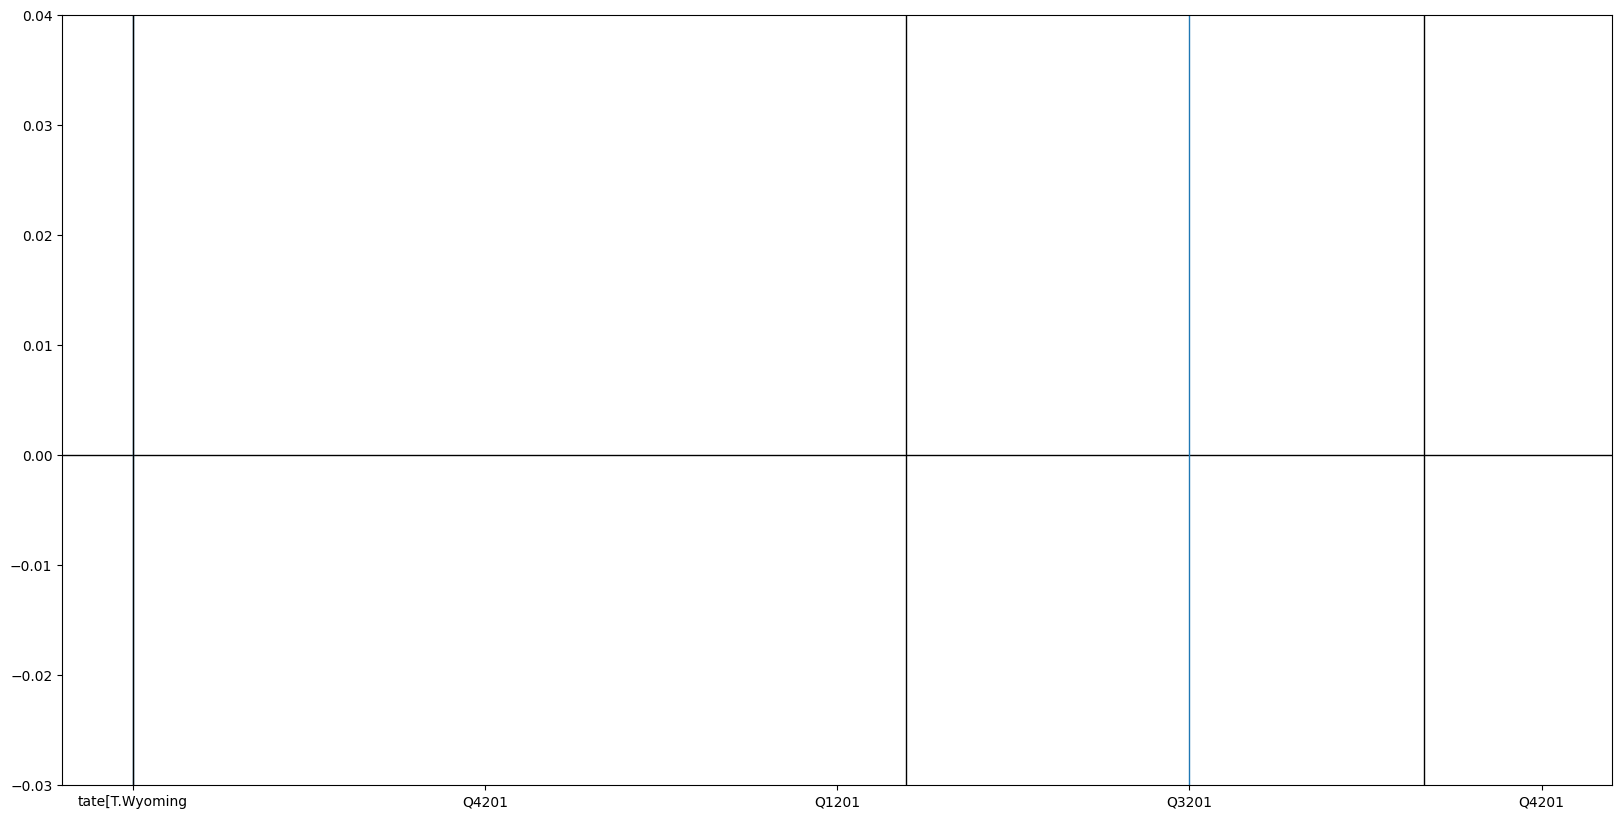

In [335]:
fig, axes = plt.subplots(1,1);
axes.set_xticks([i for i in range(len(labels))], labels = labels);
axes.hlines(y=0, xmin=-1, xmax = len(labels), color = 'black', lw=1)
for i, interval in enumerate(confidence_intervals):
    axes.vlines(x = i, ymin=interval[0], ymax=interval[1], lw = 1)
axes.plot(coeff, 'o-', lw=1, color = 'black');
axes.set_ylim(bottom = -0.03, top = 0.04);

In [165]:
bounds, coefficients

([('   -0.016', '    0.011'),
  ('   -0.008', '    0.018'),
  ('    0.003', '    0.030'),
  ('   -0.002', '    0.024'),
  ('    0.004', '    0.031')],
 ['   -0.0024', '    0.0049', '    0.0164', '    0.0108', '    0.0175'])

In [156]:
coefficients

['   -0.0024', '    0.0049', '    0.0164', '    0.0108', '    0.0175']

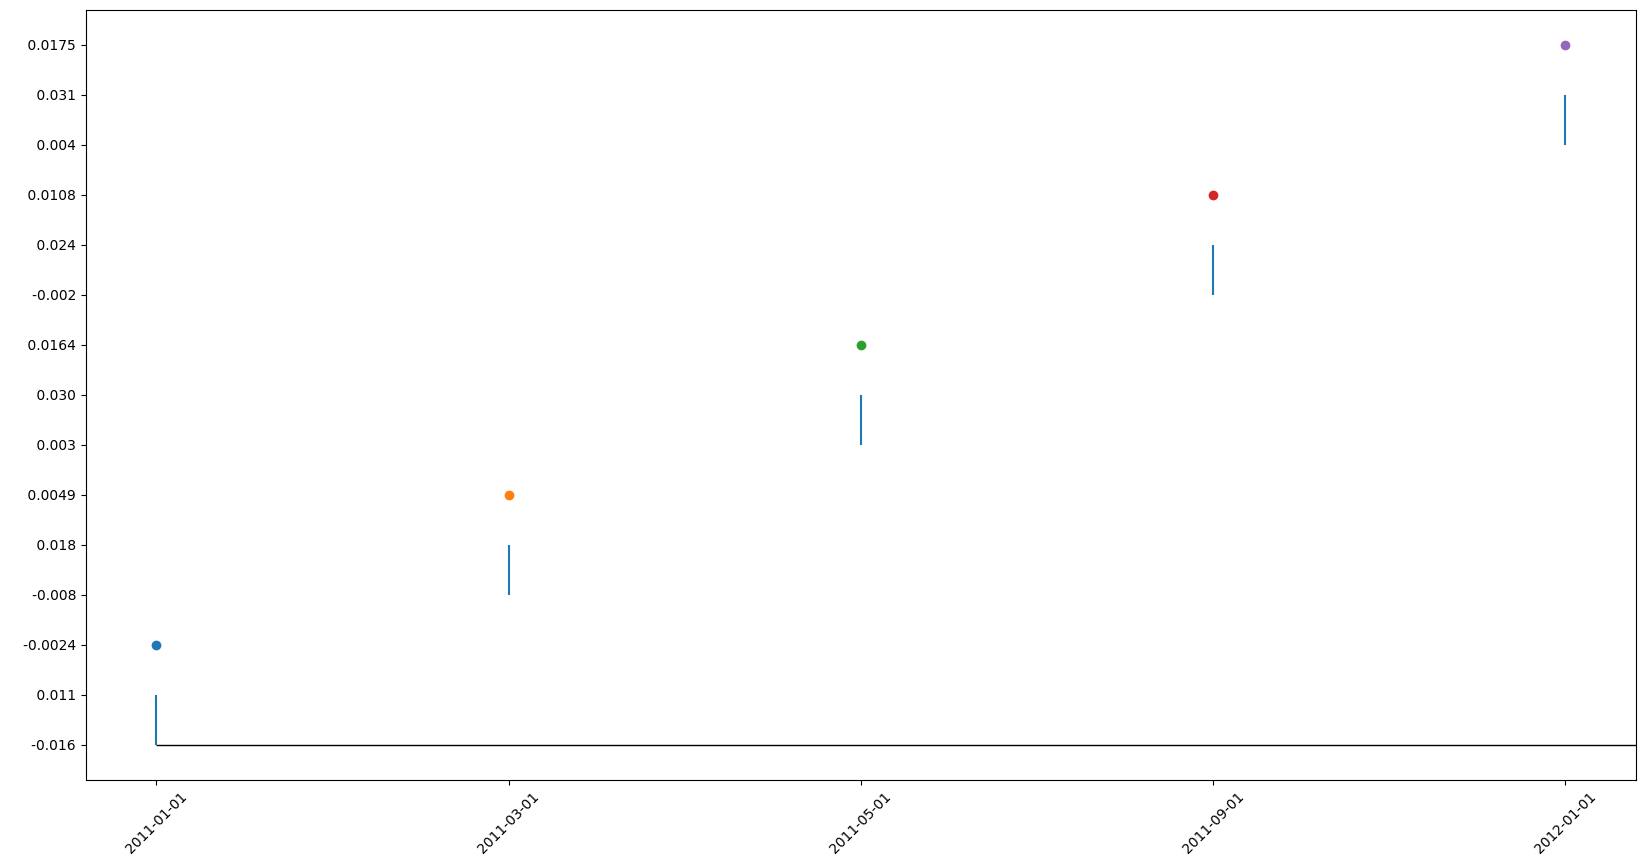

In [173]:
plt.xticks(ticks=[i for i in range(len(labels))], labels = labels, rotation=45);
plt.hlines(y=0, xmin = 0,lw = 1, xmax = len(labels), color = 'black')


for i in range(len(bounds)):
    plt.vlines(x = i, ymax = bounds[i][1], ymin = bounds[i][0]);
    plt.plot(i, coefficients[i], 'o', lw = 3)
